# *Import Library*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import missingno as msno

# To get new datatypes and functions
from collections import Counter
from cycler import cycler

from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor

# *DATASET UPLOAD*

In [2]:
columnname = pd.read_excel("features.xlsx")
column = columnname["degiskenismi"]

In [3]:
x_train = pd.read_excel("final_x_train.xlsx", names = column)
x_test = pd.read_excel("final_x_test.xlsx", names = column)
y_train = pd.read_excel("final_y_train.xlsx", names = ["activity"]) - 1
y_test = pd.read_excel("final_y_test.xlsx", names = ["activity"]) - 1

In [5]:
x_train.head()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0               0.29              -0.02              -0.18             -0.48   
1               0.17               0.01              -0.05             -0.61   
2               0.39              -0.03              -0.01             -0.68   
3               0.35              -0.02              -0.00             -0.65   
4               0.25              -0.00              -0.14             -0.62   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0             -0.45             -0.24             -0.53             -0.48   
1             -0.54             -0.36             -0.65             -0.55   
2             -0.47             -0.42             -0.71             -0.50   
3             -0.46             -0.36             -0.70             -0.50   
4             -0.54             -0.21             -0.68             -0.55   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyroJerkMag-meanFreq()  \
0             -0.25             -0.06  ...                             0.21   
1             -0.34             -0.54  ...                             0.12   
2             -0.42             -0.47  ...                             0.10   
3             -0.35             -0.47  ...                             0.49   
4             -0.17             -0.43  ...                             0.17   

   fBodyBodyGyroJerkMag-skewness()  fBodyBodyGyroJerkMag-kurtosis()  \
0                            -0.47                            -0.85   
1                            -0.51                            -0.86   
2                            -0.63                            -0.94   
3                            -0.24                            -0.55   
4                            -0.22                            -0.58   

   angle(tBodyAccMean,gravity)  angle(tBodyAccJerkMean),gravityMean)  \
0                        -0.34                                  0.94   
1                         0.67                                 -0.45   
2                        -0.14                                  0.42   
3                        -0.04                                  0.34   
4                         0.13                                 -0.91   

   angle(tBodyGyroMean,gravityMean)  angle(tBodyGyroJerkMean,gravityMean)  \
0                             -0.60                                  0.49   
1                              0.41                                  0.44   
2                              0.55                                  0.09   
3                              0.61                                 -0.42   
4                              0.65                                 -0.76   

   angle(X,gravityMean)  angle(Y,gravityMean)  angle(Z,gravityMean)  
0                 -0.59                  0.10                  0.31  
1                 -0.58                  0.09                  0.32  
2                 -0.60                  0.08                  0.31  
3                 -0.64                  0.09                  0.28  
4                 -0.67                  0.09                  0.26  

[5 rows x 561 columns]

In [7]:
x_train.shape

(4251, 561)

In [8]:
x_test.shape

(1491, 561)

In [9]:
x_train.dtypes

tBodyAcc-mean()-X                       float64
tBodyAcc-mean()-Y                       float64
tBodyAcc-mean()-Z                       float64
tBodyAcc-std()-X                        float64
tBodyAcc-std()-Y                        float64
                                         ...   
angle(tBodyGyroMean,gravityMean)        float64
angle(tBodyGyroJerkMean,gravityMean)    float64
angle(X,gravityMean)                    float64
angle(Y,gravityMean)                    float64
angle(Z,gravityMean)                    float64
Length: 561, dtype: object

### All variables are numeric

In [10]:
x_train.isnull().sum()

tBodyAcc-mean()-X                       0
tBodyAcc-mean()-Y                       0
tBodyAcc-mean()-Z                       0
tBodyAcc-std()-X                        0
tBodyAcc-std()-Y                        0
                                       ..
angle(tBodyGyroMean,gravityMean)        0
angle(tBodyGyroJerkMean,gravityMean)    0
angle(X,gravityMean)                    0
angle(Y,gravityMean)                    0
angle(Z,gravityMean)                    0
Length: 561, dtype: int64

Text(0.5, 1.0, 'Train set')

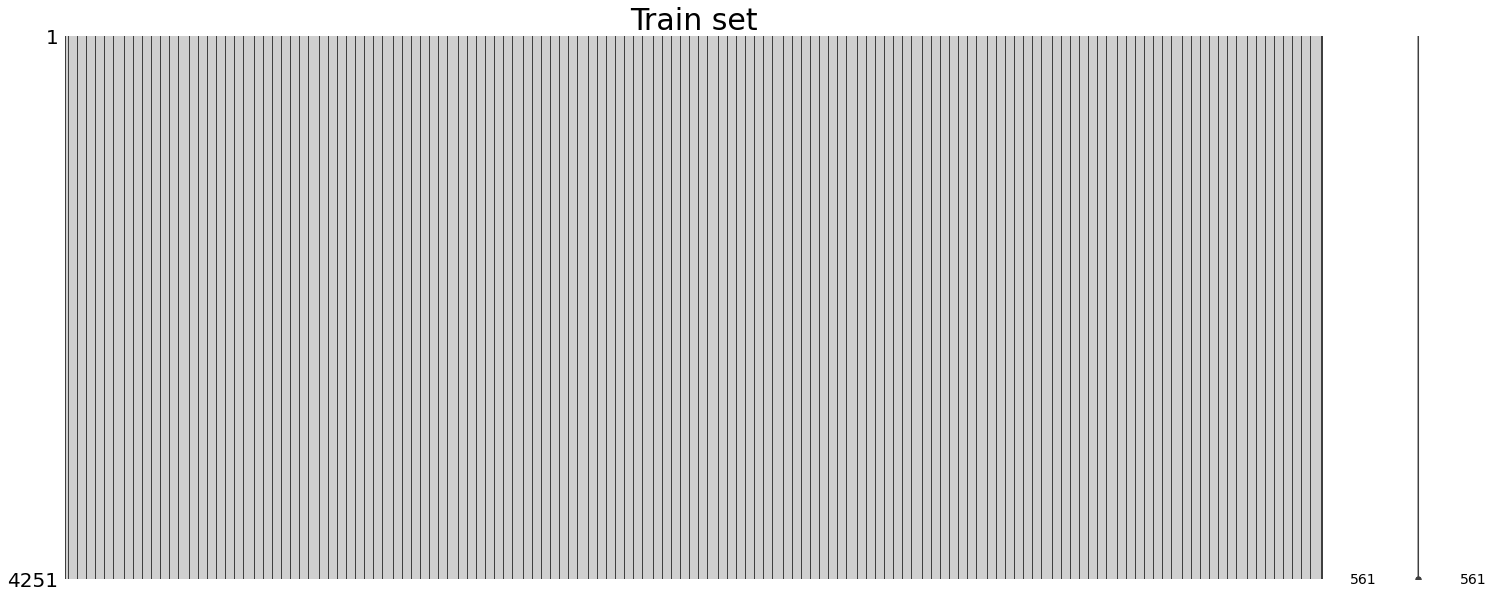

In [17]:
msno.matrix(x_train).set_title("Train Set Missing Map",fontsize=30)

### There is no missing Value ( NA ) here

Text(0.5, 1.0, 'Test Set Missing Map')

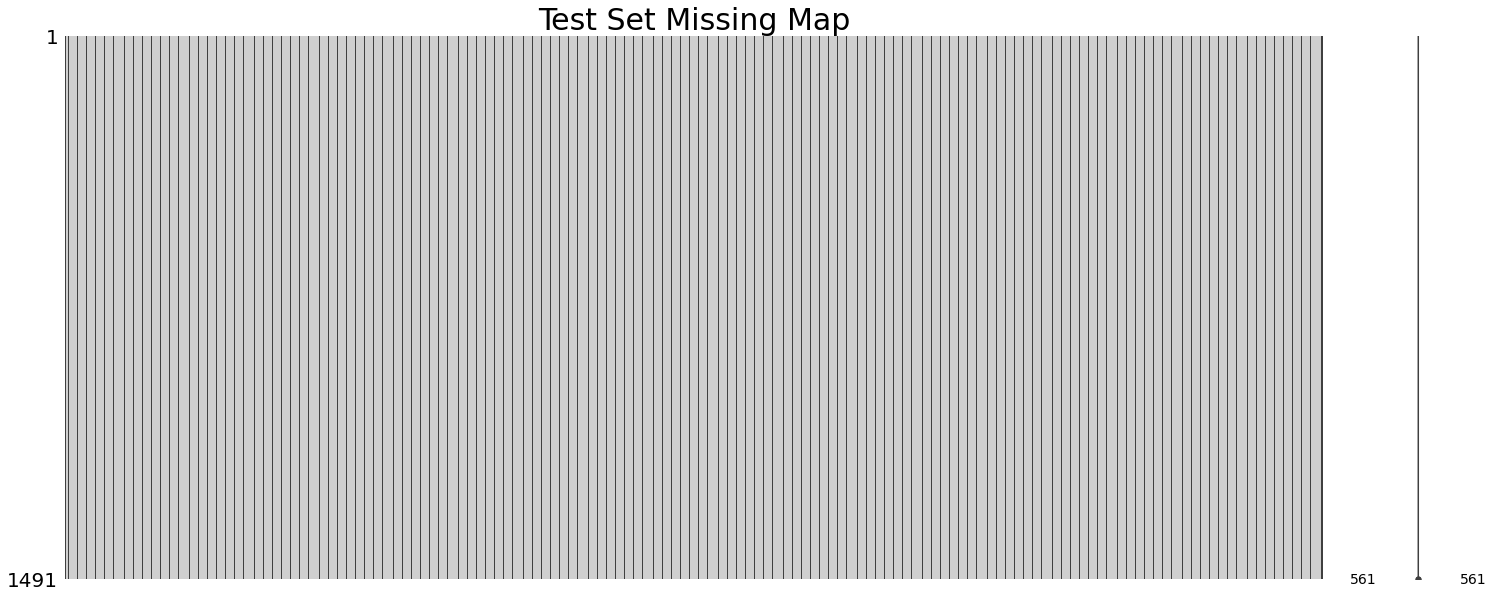

In [6]:
msno.matrix(x_test).set_title("Test Set Missing Map",fontsize=30)

### There is no missing Value ( NA ) here

In [13]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """
    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Parameters
    ----------
    dataframe: dataframe
        değişken isimleri alınmak istenen data framee.
    cat_th: int, float
    numerik fakat kategorik olan değişkenler için sınıf eşif değeri
    car_th: int, float
    kategorik fakat kardinal değişkenler için sınıf eşik değeri
    Returns
    -------
    cat_cols: list
        Lategorik değişken listesi
    num_cols: list
        Numerik değişken listesi
    cat_but_card:
        Kategorik görünümlü kardinal değişken listesi
    Notes
    ------
    cat_cols + num_cols + cat_but_car = toplam değişken sayısı
    num_but_card  cat_cols'un içinde
    Return olan 3 liste toplamı toplam değişken sayısına eşittir
    """

    cat_cols = [col for col in dataframe.columns if dataframe[col].dtype in ["category","object","bool"]]
    num_cat_cols = [col for col in dataframe.columns if dataframe[col].dtype in ["int64","int32","float64","float32"]
                    and dataframe[col].nunique() < cat_th]
    cat_cols += num_cat_cols

    cat_but_car = [col for col in dataframe.columns if dataframe[col].dtype in ["category","object"]
                   and dataframe[col].nunique() > car_th]

    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtype in ["int64","float64"]
                and dataframe[col].nunique() > cat_th]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f"cat_cols: {len(cat_cols)}")
    print(f"num_cols: {len(num_cols)}")
    print(f"cat_but_car: {len(cat_but_car)}")
    print(f"num_cat_cols: {len(num_cat_cols)}")

    return cat_cols,num_cols,cat_but_car




In [14]:
cat_cols,num_cols,cat_but_car = grab_col_names(x_train)

Observations: 4251
Variables: 561
cat_cols: 0
num_cols: 561
cat_but_car: 0
num_cat_cols: 0


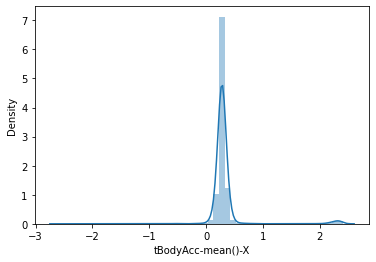

In [6]:
sns.distplot(x_train["tBodyAcc-mean()-X"])
plt.show()

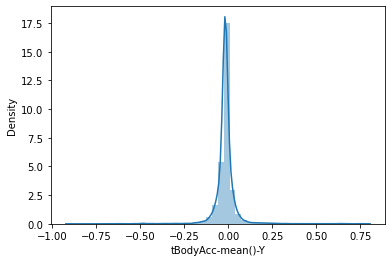

In [8]:
sns.distplot(x_train["tBodyAcc-mean()-Y"])
plt.show()

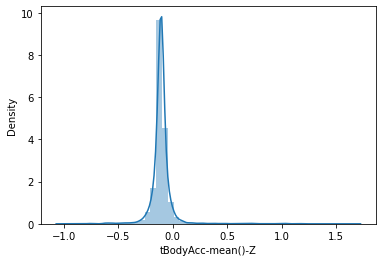

In [9]:
sns.distplot(x_train["tBodyAcc-mean()-Z"])
plt.show()



# PCA


In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from pca import pca

pca = PCA(n_components=None)
pca_fit = pca.fit(x_train)

In [17]:
# CUMULATIVE VARIANCE VALUES
def get_variance(X, n):
    scaler = StandardScaler()
    pca = PCA(n_components=n)

    pca.fit(scaler.fit_transform(X))

    return pca.explained_variance_ratio_.cumsum()[-1:]
for i in range(1,150):
    print('Components:\t', i, '=\t', get_variance(x_train, i),
          '\tCumulative Variance')

Components:	 1 =	 [0.44741978] 	Cumulative Variance
Components:	 2 =	 [0.50825805] 	Cumulative Variance
Components:	 3 =	 [0.54729799] 	Cumulative Variance
Components:	 4 =	 [0.58084337] 	Cumulative Variance
Components:	 5 =	 [0.59988801] 	Cumulative Variance
Components:	 6 =	 [0.61615581] 	Cumulative Variance
Components:	 7 =	 [0.63156193] 	Cumulative Variance
Components:	 8 =	 [0.64592706] 	Cumulative Variance
Components:	 9 =	 [0.65884761] 	Cumulative Variance
Components:	 10 =	 [0.67118396] 	Cumulative Variance
Components:	 11 =	 [0.68179875] 	Cumulative Variance
Components:	 12 =	 [0.69211553] 	Cumulative Variance
Components:	 13 =	 [0.70241593] 	Cumulative Variance
Components:	 14 =	 [0.7114471] 	Cumulative Variance
Components:	 15 =	 [0.71993122] 	Cumulative Variance
Components:	 16 =	 [0.72746329] 	Cumulative Variance
Components:	 17 =	 [0.73442352] 	Cumulative Variance
Components:	 18 =	 [0.74106911] 	Cumulative Variance
Components:	 19 =	 [0.74748702] 	Cumulative Variance
Com

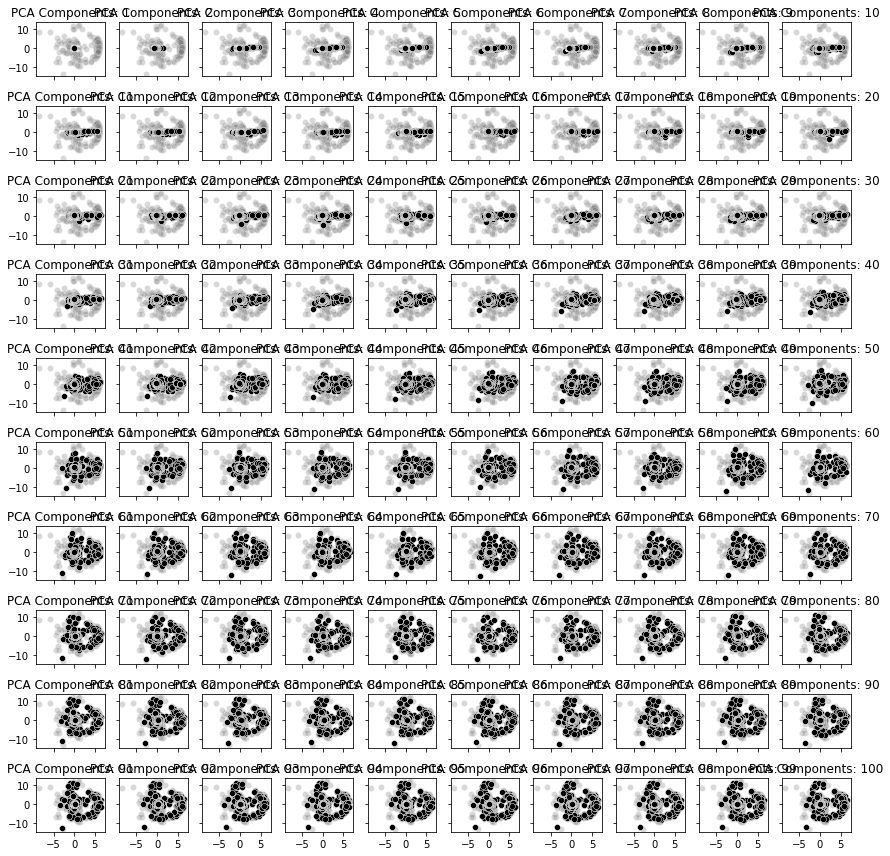

In [25]:

def transform_pca(X, n):

    pca = PCA(n_components=n)
    pca.fit(X)
    X_new = pca.inverse_transform(pca.transform(X))

    return X_new

rows = 10
cols = 10
comps = 1

X = x_train
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

fig, axes = plt.subplots(rows,
                         cols,
                         figsize=(12,12),
                         sharex=True,
                         sharey=True)


for row in range(rows):
    for col in range(cols):
        try:
            X_new = transform_pca(X_scaled, comps)
            ax = sns.scatterplot(x=X_scaled[:, 0],
                                 y=X_scaled[:, 1],
                                 ax=axes[row, col],
                                 color='grey',
                                 alpha=.3)
            ax = sns.scatterplot(x=X_new[:, 0],
                                 y=X_new[:, 1],
                                 ax=axes[row, col],
                                 color='black')
            ax.set_title(f'PCA Components: {comps}');

            comps += 1
        except:
            pass
plt.tight_layout()
plt.show()


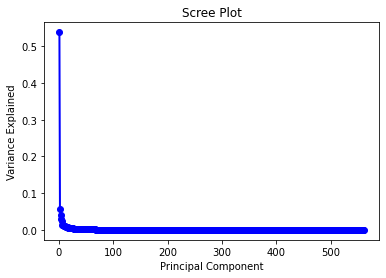

In [26]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

## *Since 69 components can explain 90% of the dataset, the number of components was determined as 69.*

In [30]:
#PCA SCORES

pca = PCA(n_components=69)

pca_x_train = pca.fit_transform(x_train)
pca_x_test = pca.fit_transform(x_test)

In [34]:
pca_x_train = pd.DataFrame(pca_x_train)

In [35]:
pca_x_train.head()

0     1     2     3     4     5     6    7     8     9   ...    59    60  \
0 3.31  0.78 -1.44 -0.03 -0.70 -0.74 -0.48 0.52 -0.15 -0.40  ... -0.25 -0.43   
1 2.47 -0.40 -1.67  0.37 -0.41 -0.47 -0.17 0.89  0.11 -0.45  ...  0.14 -0.44   
2 2.12 -0.14 -2.22 -0.01 -0.29  0.43  0.10 1.02 -0.10 -0.85  ... -0.13 -0.35   
3 1.74  0.62 -2.65 -0.37 -0.40  0.72 -0.06 0.30 -0.14 -0.37  ... -0.12 -0.34   
4 2.16  0.40 -2.17  0.26 -0.38 -0.28 -0.27 0.20  0.40 -0.00  ... -0.56 -0.22   

     61    62    63    64    65    66    67    68  
0  0.45  0.18  0.14 -0.61 -0.23  0.30  0.25  0.38  
1  0.42  0.25  0.32  0.07 -0.31  0.28 -0.31 -0.27  
2 -0.00 -0.19  0.48  0.19 -0.28 -0.03 -0.21  0.09  
3 -0.01 -0.12  0.33 -0.02  0.08  0.17  0.07  0.17  
4  0.25  0.05 -0.02 -0.47 -0.11  0.48 -0.05  0.08  

[5 rows x 69 columns]

In [37]:
pca_x_test = pd.DataFrame(pca_x_test)

In [38]:
pca_x_test.head()

0    1     2     3    4     5    6     7     8     9   ...    59    60  \
0 -1.43 3.01 -0.23 -0.16 0.87  0.51 0.07 -0.15 -1.65 -0.94  ... -0.09  0.21   
1 -1.99 2.17  0.12 -0.34 1.84 -0.07 0.46 -0.39 -1.34 -0.65  ... -0.18 -0.18   
2 -3.81 1.77  0.62 -0.32 1.24 -0.32 0.78 -0.94 -1.15  0.16  ...  0.03  0.52   
3 -4.47 2.37  0.16  0.27 1.91 -1.43 2.57 -0.90 -0.27 -0.06  ...  0.52  0.13   
4 -4.89 2.23  0.55  0.25 1.70 -1.44 2.74 -0.60 -0.48 -0.16  ...  0.52  0.39   

     61    62    63    64    65   66    67    68  
0  0.57  0.15  0.12  0.41 -0.05 0.62 -0.05 -0.24  
1  0.45  0.19 -0.12  0.24 -0.17 0.53 -0.28 -0.15  
2  0.01 -0.39 -0.02 -0.05 -0.67 0.50  0.00 -0.11  
3 -0.01 -0.09  0.10 -0.33 -0.54 0.19 -0.04 -0.05  
4  0.05 -0.15  0.34 -0.25 -0.48 0.15 -0.00  0.10  

[5 rows x 69 columns]

#  ALL CLASSIFICATION MODELS WITH PCA_SCORE 
# 69 COMPONENTS , %90 VARIANCE RATIO

In [54]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor

In [55]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(pca_x_train, pca_x_test, y_train, y_test)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [01:09<00:00,  2.40s/it]


Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
AdaBoostClassifier                 0.39               0.39    None      0.35   
BaggingClassifier                  0.38               0.37    None      0.34   
RandomForestClassifier             0.36               0.35    None      0.32   
LGBMClassifier                     0.36               0.35    None      0.32   
DecisionTreeClassifier             0.33               0.33    None      0.32   
XGBClassifier                      0.32               0.32    None      0.29   
SGDClassifier                      0.32               0.31    None      0.30   
ExtraTreesClassifier               0.30               0.29    None      0.27   
GaussianNB                         0.29               0.28    None      0.25   
Perceptron                         0.29               0.28    None      0.29   
ExtraTreeClassifier                0.28               0.28    None      0.28   
LogisticRegression                 0.29               0.28    None      0.27   
LinearSVC                          0.27               0.27    None      0.27   
CalibratedClassifierCV             0.27               0.27    None      0.27   
LinearDiscriminantAnalysis         0.26               0.25    None      0.24   
PassiveAggressiveClassifier        0.24               0.24    None      0.25   
BernoulliNB                        0.24               0.23    None      0.23   
QuadraticDiscriminantAnalysis      0.23               0.23    None      0.15   
KNeighborsClassifier               0.24               0.22    None      0.20   
SVC                                0.23               0.22    None      0.22   
NuSVC                              0.21               0.21    None      0.20   
NearestCentroid                    0.21               0.20    None      0.20   
LabelSpreading                     0.17               0.17    None      0.05   
LabelPropagation                   0.17               0.17    None      0.05   
DummyClassifier                    0.19               0.17    None      0.06   
RidgeClassifier                    0.17               0.17    None      0.17   
RidgeClassifierCV                  0.17               0.17    None      0.17   

                               Time Taken  
Model                                      
AdaBoostClassifier                   2.99  
BaggingClassifier                    3.95  
RandomForestClassifier               4.42  
LGBMClassifier                       6.05  
DecisionTreeClassifier               0.57  
XGBClassifier                       20.39  
SGDClassifier                        0.76  
ExtraTreesClassifier                 1.30  
GaussianNB                           0.11  
Perceptron                           0.16  
ExtraTreeClassifier                  0.06  
LogisticRegression                   0.49  
LinearSVC                            4.12  
CalibratedClassifierCV               9.04  
LinearDiscriminantAnalysis           0.12  
PassiveAggressiveClassifier          0.20  
BernoulliNB                          0.08  
QuadraticDiscriminantAnalysis        0.12  
KNeighborsClassifier                 0.66  
SVC                                  2.68  
NuSVC                                4.43  
NearestCentroid                      0.05  
LabelSpreading                       4.07  
LabelPropagation                     2.57  
DummyClassifier                      0.04  
RidgeClassifier                      0.07  
RidgeClassifierCV                    0.10

# 108 COMPONENTS , %95 VARIANCE RATIO

In [56]:
#PCA SCORES

pca = PCA(n_components=108)

pca_x_train_2 = pca.fit_transform(x_train)
pca_x_test_2 = pca.fit_transform(x_test)

In [57]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(pca_x_train_2, pca_x_test_2, y_train, y_test)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [01:46<00:00,  3.66s/it]


Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
AdaBoostClassifier                 0.39               0.40    None      0.36   
BaggingClassifier                  0.38               0.37    None      0.35   
DecisionTreeClassifier             0.37               0.36    None      0.35   
RandomForestClassifier             0.36               0.35    None      0.32   
LGBMClassifier                     0.35               0.34    None      0.31   
ExtraTreesClassifier               0.34               0.34    None      0.32   
XGBClassifier                      0.33               0.31    None      0.29   
SGDClassifier                      0.31               0.30    None      0.27   
GaussianNB                         0.29               0.28    None      0.25   
CalibratedClassifierCV             0.27               0.26    None      0.27   
LinearSVC                          0.27               0.26    None      0.26   
PassiveAggressiveClassifier        0.26               0.26    None      0.26   
LinearDiscriminantAnalysis         0.26               0.25    None      0.25   
BernoulliNB                        0.25               0.25    None      0.25   
Perceptron                         0.25               0.25    None      0.25   
LogisticRegression                 0.26               0.25    None      0.24   
ExtraTreeClassifier                0.22               0.22    None      0.22   
SVC                                0.21               0.20    None      0.20   
NearestCentroid                    0.21               0.20    None      0.20   
NuSVC                              0.20               0.19    None      0.19   
QuadraticDiscriminantAnalysis      0.18               0.19    None      0.10   
RidgeClassifier                    0.19               0.18    None      0.19   
KNeighborsClassifier               0.19               0.18    None      0.15   
RidgeClassifierCV                  0.19               0.18    None      0.19   
LabelSpreading                     0.16               0.17    None      0.05   
LabelPropagation                   0.16               0.17    None      0.05   
DummyClassifier                    0.19               0.17    None      0.06   

                               Time Taken  
Model                                      
AdaBoostClassifier                   6.38  
BaggingClassifier                    5.93  
DecisionTreeClassifier               0.83  
RandomForestClassifier               4.68  
LGBMClassifier                      12.22  
ExtraTreesClassifier                 1.97  
XGBClassifier                       41.79  
SGDClassifier                        0.67  
GaussianNB                           0.10  
CalibratedClassifierCV              11.71  
LinearSVC                            3.91  
PassiveAggressiveClassifier          0.29  
LinearDiscriminantAnalysis           0.27  
BernoulliNB                          0.13  
Perceptron                           0.20  
LogisticRegression                   0.89  
ExtraTreeClassifier                  0.07  
SVC                                  3.35  
NearestCentroid                      0.08  
NuSVC                                4.53  
QuadraticDiscriminantAnalysis        0.14  
RidgeClassifier                      0.08  
KNeighborsClassifier                 0.35  
RidgeClassifierCV                    0.14  
LabelSpreading                       2.63  
LabelPropagation                     2.63  
DummyClassifier                      0.06

# LOGISTIC  REGRESSION 

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [59]:
logistic_model = LogisticRegression().fit(pca_x_train,y_train)

In [65]:
y_pred = logistic_model.predict(pca_x_test)

In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.25      0.29      0.27       243
           1       0.37      0.28      0.32       229
           2       0.26      0.23      0.24       239
           3       0.35      0.54      0.43       288
           4       0.20      0.14      0.17       254
           5       0.16      0.13      0.15       238

    accuracy                           0.28      1491
   macro avg       0.27      0.27      0.26      1491
weighted avg       0.27      0.28      0.27      1491



# Classification models with standardized pca_score ( 69 components )

In [76]:
from sklearn.preprocessing import StandardScaler

In [81]:
#### STANDARDIZATION ####

pca_x_train_scaled = StandardScaler().fit_transform(pca_x_train)
pca_x_train_scaled = pd.DataFrame(pca_x_train_scaled)

In [82]:
pca_x_train_scaled.head()

0     1     2     3     4     5     6    7     8     9   ...    59    60  \
0 0.60  0.44 -0.94 -0.03 -0.59 -0.81 -0.56 0.62 -0.19 -0.52  ... -0.90 -1.62   
1 0.45 -0.22 -1.09  0.29 -0.35 -0.51 -0.20 1.07  0.14 -0.58  ...  0.53 -1.66   
2 0.39 -0.08 -1.45 -0.01 -0.25  0.48  0.12 1.23 -0.12 -1.09  ... -0.46 -1.30   
3 0.32  0.35 -1.73 -0.29 -0.34  0.79 -0.07 0.36 -0.17 -0.48  ... -0.45 -1.27   
4 0.39  0.22 -1.42  0.21 -0.32 -0.31 -0.31 0.24  0.49 -0.00  ... -2.06 -0.82   

     61    62    63    64    65    66    67    68  
0  1.72  0.69  0.56 -2.35 -0.92  1.21  1.03  1.54  
1  1.57  0.96  1.24  0.26 -1.22  1.13 -1.25 -1.11  
2 -0.01 -0.74  1.84  0.72 -1.10 -0.11 -0.87  0.35  
3 -0.02 -0.46  1.27 -0.06  0.30  0.68  0.29  0.69  
4  0.95  0.18 -0.08 -1.81 -0.45  1.91 -0.22  0.34  

[5 rows x 69 columns]

In [83]:
#### STANDARDIZATION ####

pca_x_test_scaled = StandardScaler().fit_transform(pca_x_test)
pca_x_test_scaled = pd.DataFrame(pca_x_test_scaled)

In [84]:
pca_x_test_scaled.head()

0    1     2     3    4     5    6     7     8     9   ...    59    60  \
0 -0.25 1.52 -0.13 -0.11 0.72  0.48 0.07 -0.16 -1.90 -1.15  ... -0.33  0.75   
1 -0.35 1.09  0.07 -0.23 1.52 -0.06 0.46 -0.43 -1.55 -0.80  ... -0.62 -0.65   
2 -0.67 0.89  0.36 -0.22 1.02 -0.30 0.78 -1.03 -1.33  0.19  ...  0.12  1.87   
3 -0.79 1.19  0.09  0.19 1.58 -1.33 2.54 -0.99 -0.32 -0.07  ...  1.83  0.45   
4 -0.86 1.12  0.31  0.18 1.41 -1.34 2.72 -0.66 -0.55 -0.19  ...  1.83  1.39   

     61    62    63    64    65   66    67    68  
0  2.09  0.54  0.46  1.53 -0.19 2.39 -0.20 -0.95  
1  1.65  0.69 -0.46  0.90 -0.66 2.02 -1.09 -0.59  
2  0.05 -1.45 -0.06 -0.20 -2.54 1.92  0.00 -0.43  
3 -0.05 -0.33  0.39 -1.22 -2.06 0.74 -0.15 -0.19  
4  0.19 -0.55  1.26 -0.95 -1.81 0.59 -0.02  0.41  

[5 rows x 69 columns]

##### Classification models with standardized pca_score ( 69 components )

In [85]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(pca_x_train_scaled, pca_x_test_scaled, y_train, y_test)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [01:18<00:00,  2.72s/it]


Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
AdaBoostClassifier                 0.39               0.39    None      0.35   
BaggingClassifier                  0.39               0.38    None      0.35   
RandomForestClassifier             0.38               0.37    None      0.34   
LGBMClassifier                     0.36               0.35    None      0.32   
DecisionTreeClassifier             0.35               0.34    None      0.33   
XGBClassifier                      0.33               0.32    None      0.29   
SGDClassifier                      0.31               0.30    None      0.29   
ExtraTreesClassifier               0.30               0.29    None      0.27   
ExtraTreeClassifier                0.28               0.28    None      0.28   
GaussianNB                         0.29               0.28    None      0.24   
Perceptron                         0.28               0.27    None      0.28   
LogisticRegression                 0.28               0.27    None      0.26   
LinearSVC                          0.27               0.27    None      0.27   
CalibratedClassifierCV             0.27               0.26    None      0.27   
LinearDiscriminantAnalysis         0.26               0.25    None      0.24   
PassiveAggressiveClassifier        0.24               0.24    None      0.24   
BernoulliNB                        0.24               0.23    None      0.23   
QuadraticDiscriminantAnalysis      0.22               0.23    None      0.14   
KNeighborsClassifier               0.24               0.22    None      0.20   
SVC                                0.23               0.22    None      0.22   
NuSVC                              0.21               0.21    None      0.20   
NearestCentroid                    0.21               0.20    None      0.20   
LabelSpreading                     0.17               0.17    None      0.05   
LabelPropagation                   0.17               0.17    None      0.05   
RidgeClassifierCV                  0.17               0.17    None      0.17   
DummyClassifier                    0.19               0.17    None      0.06   
RidgeClassifier                    0.17               0.17    None      0.17   

                               Time Taken  
Model                                      
AdaBoostClassifier                   3.15  
BaggingClassifier                    4.94  
RandomForestClassifier               4.33  
LGBMClassifier                       6.76  
DecisionTreeClassifier               0.61  
XGBClassifier                       21.53  
SGDClassifier                        0.63  
ExtraTreesClassifier                 1.70  
ExtraTreeClassifier                  0.11  
GaussianNB                           0.07  
Perceptron                           0.16  
LogisticRegression                   0.57  
LinearSVC                            3.45  
CalibratedClassifierCV              15.27  
LinearDiscriminantAnalysis           0.18  
PassiveAggressiveClassifier          0.22  
BernoulliNB                          0.13  
QuadraticDiscriminantAnalysis        0.14  
KNeighborsClassifier                 0.43  
SVC                                  3.23  
NuSVC                                4.55  
NearestCentroid                      0.06  
LabelSpreading                       3.62  
LabelPropagation                     2.65  
RidgeClassifierCV                    0.12  
DummyClassifier                      0.07  
RidgeClassifier                      0.08